# Regiones e Imagenes Binarias
@juan1rving 2020

Una región es un grupo de pixeles conectados que comparten una propiedad en común. Las regiones son importantes en la visión computacional por que permiten establecer el espacio que representa un determinado ente en la imágen. En este ejercicio vamos a tratar de extraer las letras de una imagen tomada en el mundo real.


In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

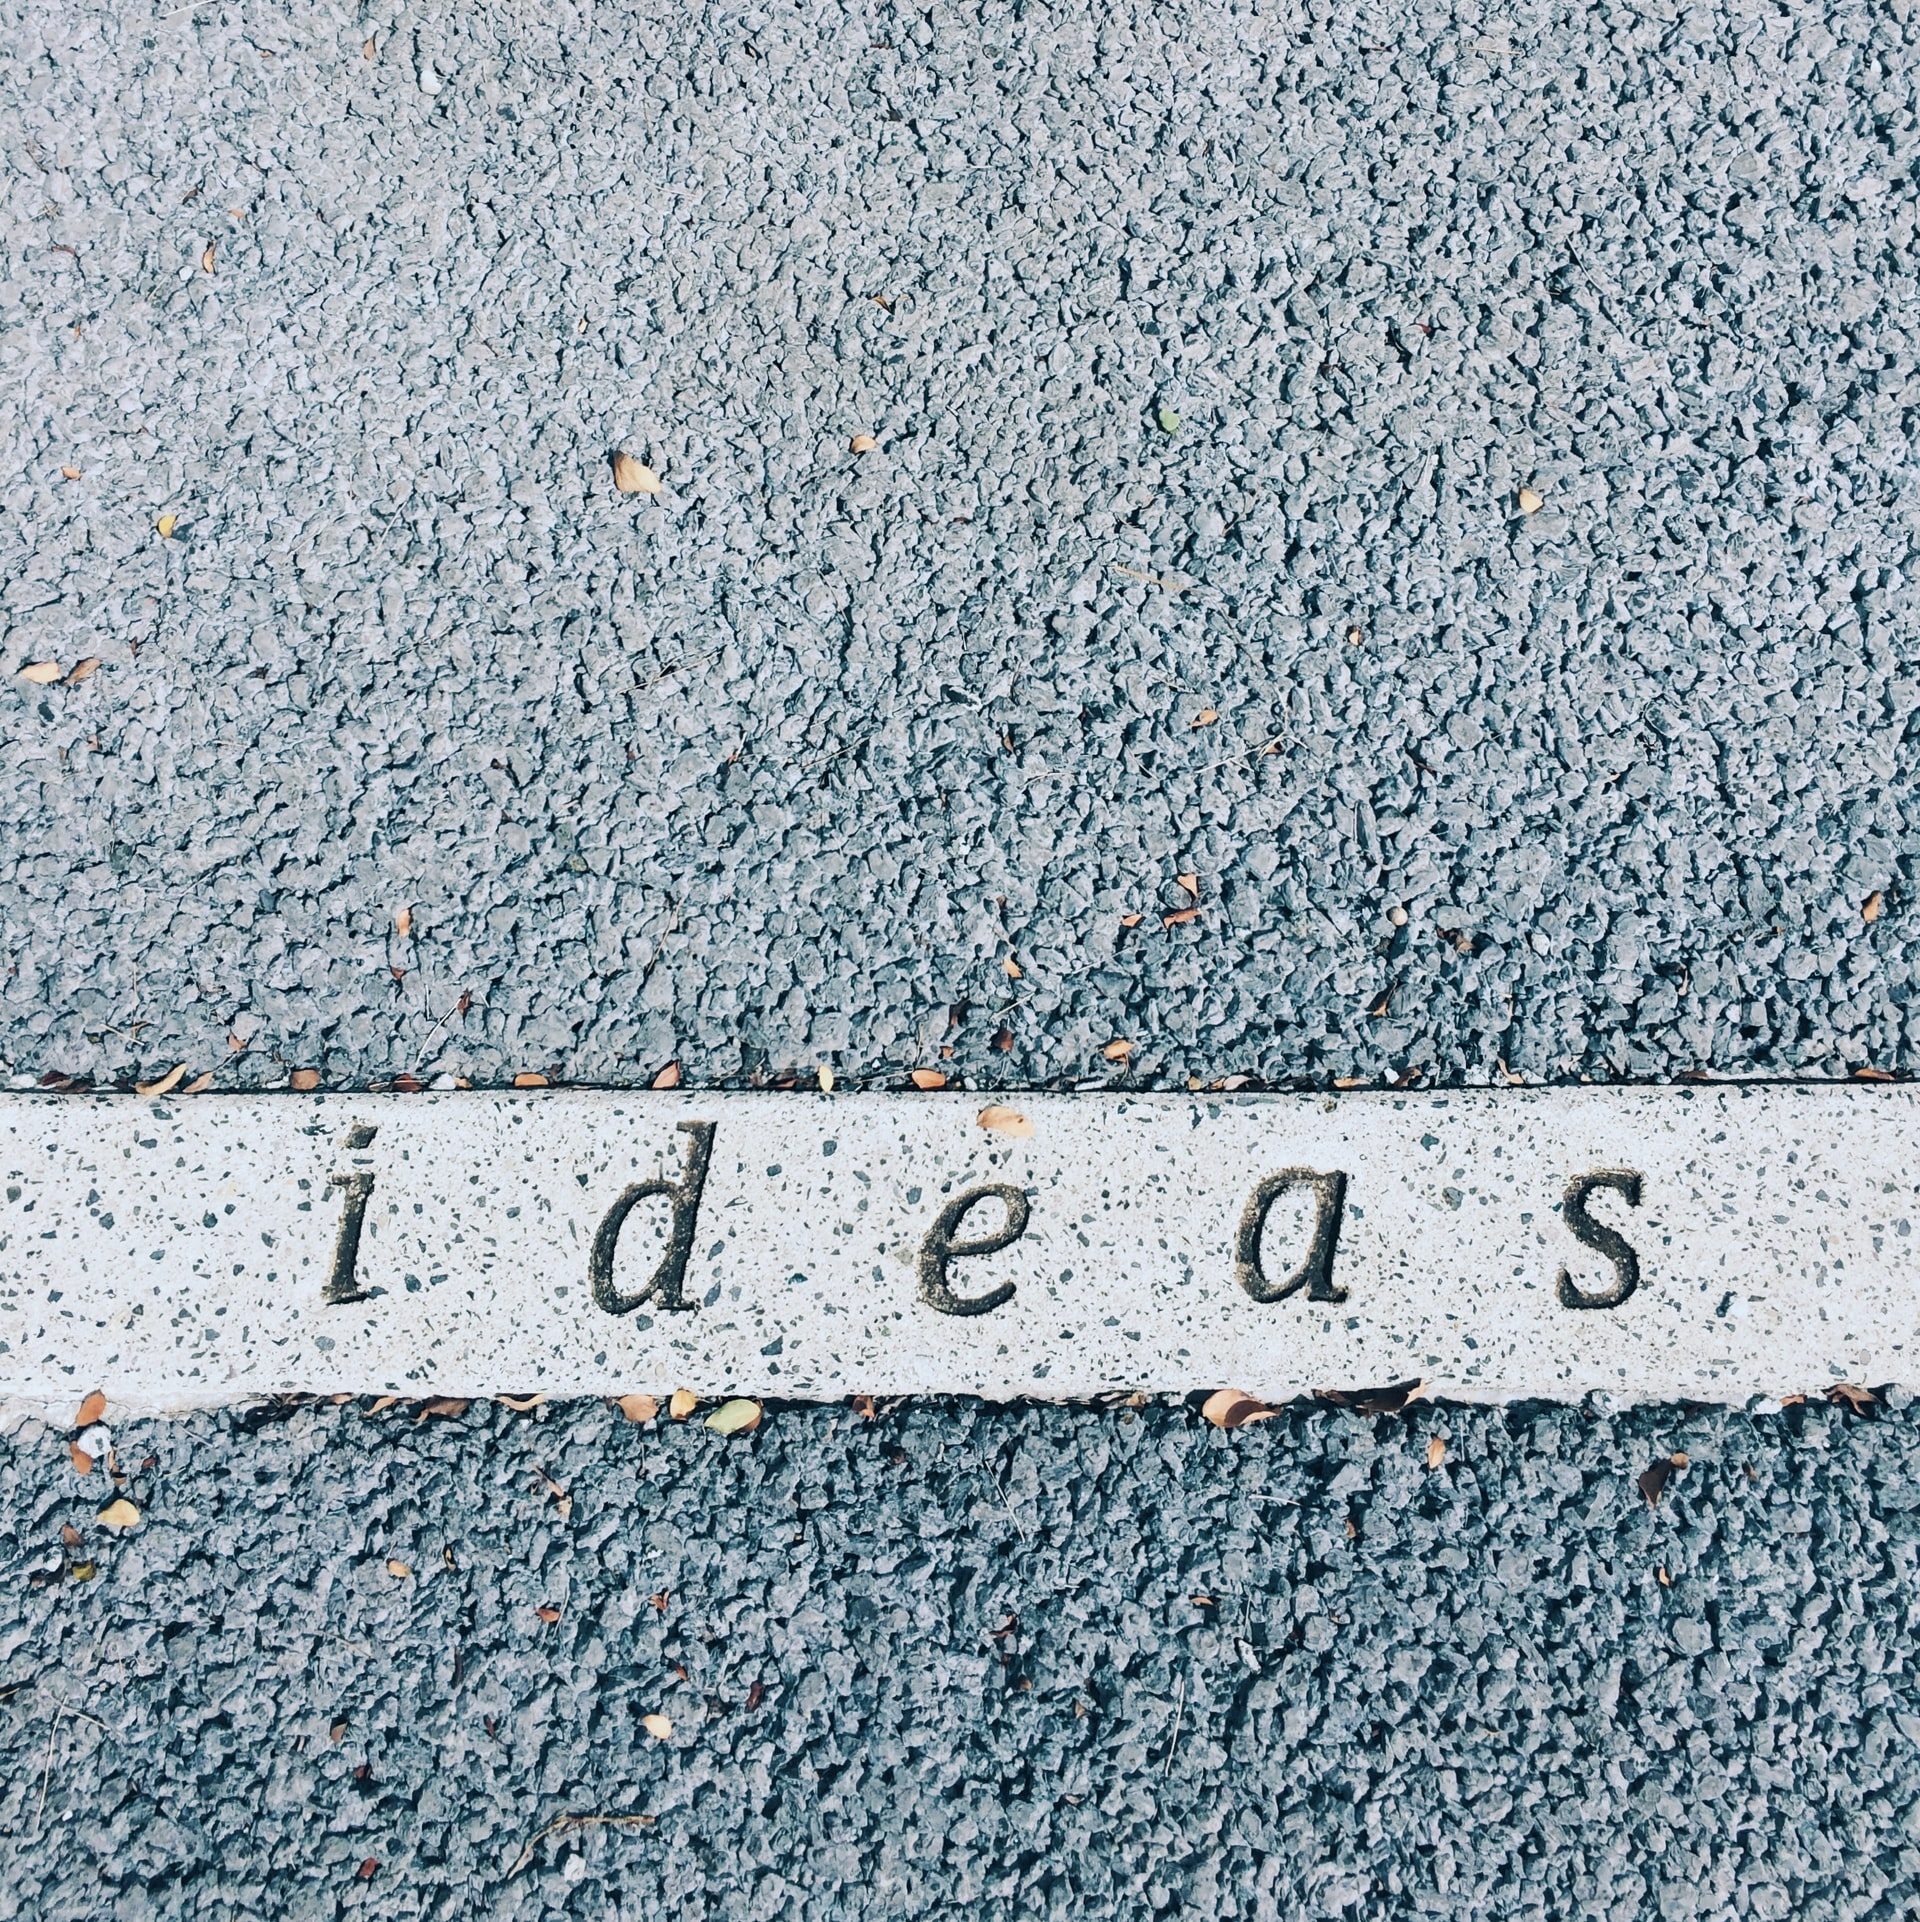

In [67]:
from IPython.display import Image
Image(filename='juan-marin-CjDuFaoVQD8-unsplash.jpg')
#Foto: Juan Marin; unsplash.com

## Leer la imagen de trabajo

Lo primero es leer el archivo de la imagen. Dado que la images es de tres canales mostraremos los canales y seleccionaremos uno para trabajar.

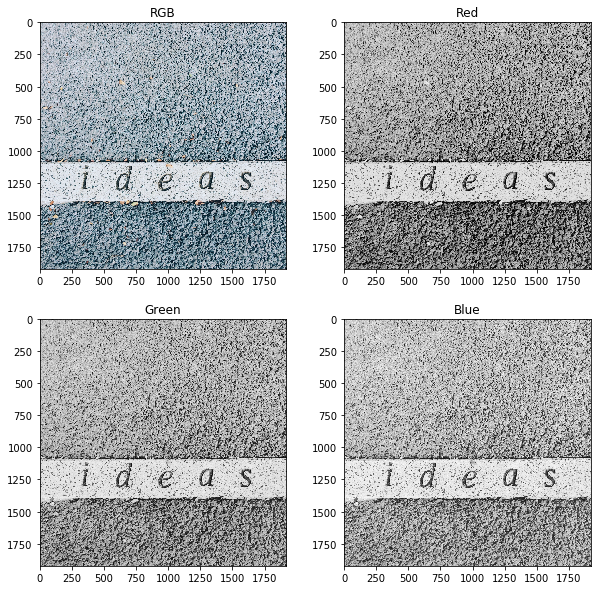

In [68]:
# Leer la imagen
image = cv2.imread('juan-marin-CjDuFaoVQD8-unsplash.jpg')

# Obtener los tres canales de la imagen
b,g,r = cv2.split(image)

# Mostrar los canales
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='gray')
plt.title('Blue')
plt.show()

In [69]:
# EJERCICIO: Seleccione un canal de la imagen para trabajar
img_grises = r

## Disminuir el ruido

A continuación intentaremos disminuir el ruido en las imágenes. Para ello haremos un filtrado gaussiano.


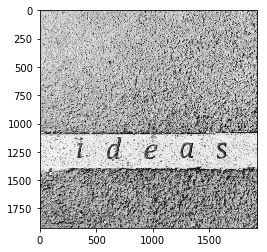

In [70]:
# yo estoy colocando un kernel de 5x5 pero tal vez no es el mejor
blur = cv2.GaussianBlur(b,(7,7),0)
plt.imshow(blur, cmap='gray')

## Umbralizado

Ahora vamos a generar regiones a partir de umbralizar la imagen. Utilizaremos el algoritmo propuesto por Otsu para realizar el umbralizado.

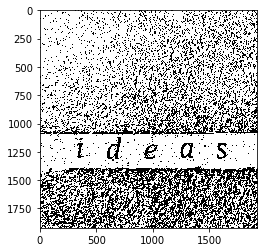

Notas algun problema? Parece que la mascara esta en negativo!


In [71]:
# Otsu's thresholding
ret3, inverse_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(inverse_mask, cmap='gray')
plt.show()
print('Notas algun problema? Parece que la mascara esta en negativo!')

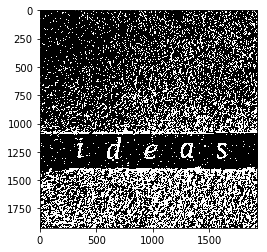

In [73]:
# Vamos a invertir la mascara usando una operacion binaria
mask = cv2.bitwise_not(inverse_mask)  
plt.imshow(mask, cmap='gray')

## Operaciones Morfológicas

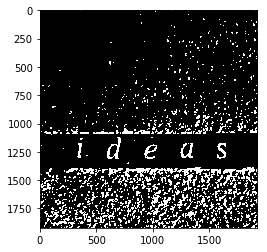

In [77]:
# Ahora utilizaremos operaciones morfológicas
# Yo aplicaré la operacion de apertura, que es igual a una erosión seguida de una dilatación.

kernel = np.ones((9,9),np.uint8)

mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(mask, cmap='gray')

## Componentes conectados

Cantidad de componentes conectados:  1121


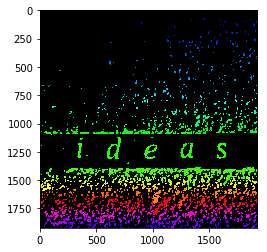

In [78]:
#ret, labels = cv2.connectedComponents(mask)
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

plt.imshow(labeled_img)

print('Cantidad de componentes conectados: ', retval)
#print(labels)

In [80]:
# Se eliminan las regiones que tienen una area muy pequeña con respecto a lo esperado

area_min = 200

for i in range(0, retval):
    area = stats[i,cv2.CC_STAT_AREA]
    if area < area_min:
        #print('Area: {}'.format(area))
        
        indices = np.where(labels == i)
        mask[indices] = 0
        

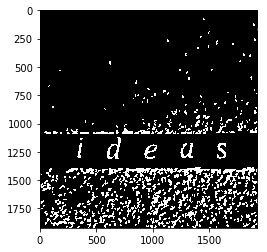

In [57]:
plt.imshow(mask, cmap='gray')

## EJERCICIO: 

Cambia los parametros e incorpora diversas restricciones para que queden solo las letras.

Tips: 
- Nuevamente es necesario encontrar los componentes conectados para actualizar las etiquetas
- Puedes descartar regiones muy grandes
- Tal vez te pueda ayudar la forma de esas regiones
- Existen otras operaciones morfológicas que puedes utilizar.